# SENIOR THESIS RESEARCH

### Imports:

In [2]:
import fsspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator,HourLocator,DayLocator
import numpy as np
import xarray as xr
from metpy.plots import USCOUNTIES
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.colors as colors
from pyproj import Proj
import seaborn as sns
sns.set()

#### Load in hourly Precip Data and calculate total for storm duration.

In [3]:
zarr_url = f's3://mdmf/gdp/stageiv_combined.zarr/'

fs2 = fsspec.filesystem('s3', anon=True, endpoint_url='https://usgs.osn.mghpcc.org/')

ds = xr.open_dataset(fs2.get_mapper(zarr_url), engine='zarr',

                             backend_kwargs={'consolidated':True}, chunks={})

ds = ds.sortby('time')

# Extract the relevant time range
start_time = '2006-09-16 12:00:00'
end_time = '2006-09-16 12:00:00'

precipitation_data = ds['Total_precipitation_surface_1_Hour_Accumulation'].sel(time=slice(start_time, end_time))

# Sum the precipitation values over the specified time range
total_precipitation = precipitation_data.sum(dim='time')

# Convert total_precipitation to inches
#conversion_factor = 0.0393701
#total_precipitation = total_precipitation * conversion_factor

np.max(total_precipitation)

<xarray.DataArray 'Total_precipitation_surface_1_Hour_Accumulation' ()> Size: 4B
dask.array<_nanmax_skip-aggregate, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>

### Plot total precip for entire CONUS.

In [4]:
ds

<xarray.Dataset> Size: 758GB
Dimensions:                                          (time: 191948, y: 881,
                                                      x: 1121, time_bounds_1: 2)
Coordinates:
    lat                                              (x, y) float32 4MB dask.array<chunksize=(102, 80), meta=np.ndarray>
    lon                                              (x, y) float32 4MB dask.array<chunksize=(102, 80), meta=np.ndarray>
  * time                                             (time) datetime64[ns] 2MB ...
Dimensions without coordinates: y, x, time_bounds_1
Data variables:
    Total_precipitation_surface_1_Hour_Accumulation  (time, y, x) float32 758GB dask.array<chunksize=(1597, 80, 102), meta=np.ndarray>
    crs                                              int32 4B ...
    time_bounds                                      (time, time_bounds_1) datetime64[ns] 3MB dask.array<chunksize=(47987, 1), meta=np.ndarray>
Attributes: (12/34)
    Conventions:                          CF-1.4
    Generating_process_or_model:          River Forecast Center Quantitative ...
    Metadata_Conventions:                 Unidata Dataset Discovery v1.0
    Originating_or_generating_Center:     US National Weather Service, Nation...
    Originating_or_generating_Subcenter:  Environmental Modeling Center
    _CoordSysBuilder:                     ucar.nc2.dataset.conv.CF1Convention
    ...                                   ...
    processing_level:                     Aggregated .grib archive from the N...
    project:                              Various
    summary:                              Mosaicked into a national product a...
    time_coverage_end:                    present
    time_coverage_start:                  2002-01-01T00:00:00Z
    title:                                United States Stage IV Quantitative...

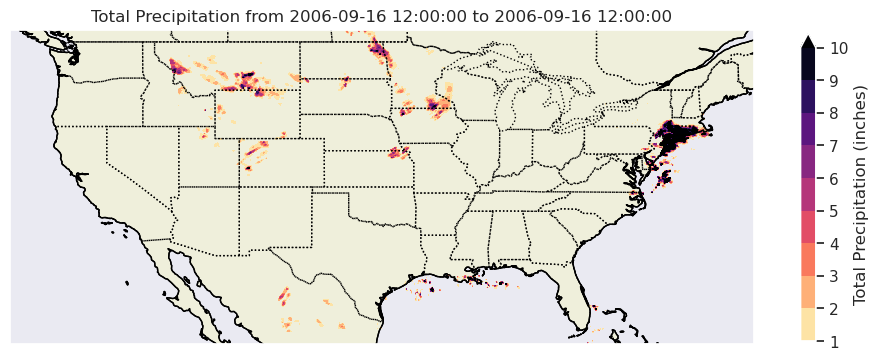

In [17]:
lon = ds['lon'].values
lat = ds['lat'].values

# Transpose the total_precipitation array if needed
total_precipitation = total_precipitation.transpose()

# Create a larger figure with Cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-128, -66.5, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Plot the total precipitation on the map
c = ax.contourf(lon, lat, total_precipitation, cmap='magma_r', levels=range(1, 11), extend='max', transform=ccrs.PlateCarree())
colorbar = plt.colorbar(c, ax=ax, label='Total Precipitation (inches)', shrink=0.5)  # Adjust the shrink parameter as needed

# Add title and labels
plt.title('Total Precipitation from {} to {}'.format(start_time, end_time))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


### Zoom in on NE CONUS.

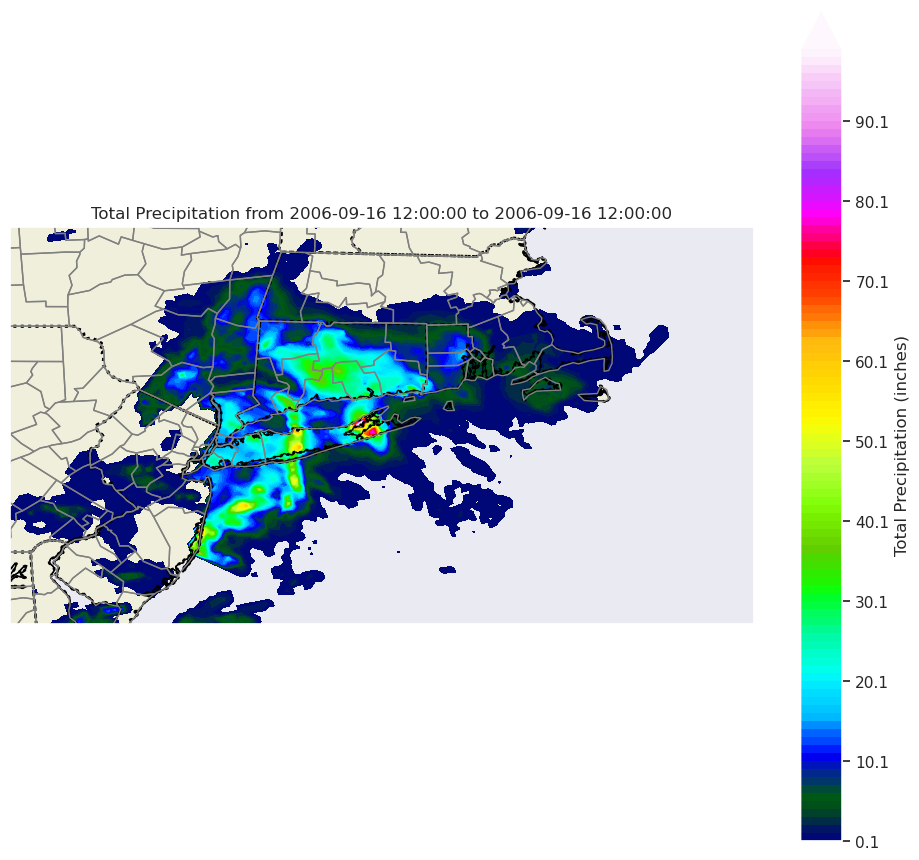

In [18]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-82, -66.5, 35, 48], crs=ccrs.PlateCarree())
ax.set_extent([-76, -68.5, 39, 43], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(USCOUNTIES,edgecolor='grey', linewidth=1)

# Plot the total precipitation on the map   (levels=range(1,10) OR WHAT I HAVE NOW
c = ax.contourf(lon, lat, total_precipitation, cmap='gist_ncar', levels=np.arange(0.1, 100, 1), extend='max', transform=ccrs.PlateCarree())
colorbar = plt.colorbar(c, ax=ax, label='Total Precipitation (inches)', shrink=0.9)  # Adjust the shrink parameter as needed

# Add title and labels
plt.title('Total Precipitation from {} to {}'.format(start_time, end_time))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

### Load in Gridded Population Data!

In [11]:
#BREAAK=BREAK ## DELETE THIS FOR IT NOT TO BREAK ON AUTO RUN #### 

df = xr.open_dataset('output_regridded.nc')
population = df.population_density
population = np.log(population)

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/home11/ugrad/2023/sr451114/Pythia_Cookoff_2024/Stage-IV-Cookbook/notebooks/output_regridded.nc'

### Create Population Index!! 

In [8]:
np.max(population)

NameError: name 'population' is not defined

In [9]:
index=total_precipitation*population
np.max(index)

NameError: name 'population' is not defined

### Plot Index over entire CONUS.

In [ ]:
# Create a larger figure with Cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-128, -66.5, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Plot the total precipitation on the map
c = ax.contourf(lon, lat, index, cmap='spring_r', transform=ccrs.PlateCarree(), levels=np.arange(1, 100, 1), extend='max')
colorbar = plt.colorbar(c, ax=ax, label='Index', shrink=0.5)  # Adjust the shrink parameter as needed

# Add title and labels
plt.title('Precipitation Index from {} to {}'.format(start_time, end_time))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


### Zoom in over the Northeast CONUS.

In [ ]:
# Create a larger figure with Cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-82, -66.5, 35, 48], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(USCOUNTIES,edgecolor='grey', linewidth=1)

# Plot the total precipitation on the map

#options
#c = ax.contourf(lon, lat, index, cmap='spring_r', transform=ccrs.PlateCarree())
#c = ax.contourf(lon, lat, index, cmap='spring_r', transform=ccrs.PlateCarree(), levels=np.linspace(1000, 9000, 1000), extend='max')
c = ax.contourf(lon, lat, index, cmap='spring_r', transform=ccrs.PlateCarree(), levels=np.arange(1, 100, 1), extend='max')

colorbar = plt.colorbar(c, ax=ax, label='Index', shrink=0.9)  # Adjust the shrink parameter as needed

# Add title and labels
plt.title('Precipitation Index {} to {}'.format(start_time, end_time))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

### Find the total sum of the CONUS-wide index.

In [ ]:
np.max(index)

### Make a new data array for only the NYC METRO AREA.  

In [ ]:
lat_min, lat_max = 40.45, 41.10
lon_min, lon_max = -74.25, -73.40

# Create boolean masks for latitude and longitude
lat_mask = (index['lat'] >= lat_min) & (index['lat'] <= lat_max)
lon_mask = (index['lon'] >= lon_min) & (index['lon'] <= lon_max)

# Use the masks to select the rectangular region
nyc_index = index.where(lat_mask & lon_mask, drop=True)
np.sum(nyc_index)

#### Check Zoomed reuslts to make sure it worked! 

In [ ]:
lon_nyc = nyc_index['lon'].values
lat_nyc = nyc_index['lat'].values

nyc_index = nyc_index.transpose()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-82, -66.5, 35, 48], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(USCOUNTIES,edgecolor='grey', linewidth=1)

# Plot the total precipitation on the map

c = ax.contourf(lon_nyc, lat_nyc, nyc_index, cmap='spring_r', transform=ccrs.PlateCarree(), levels=np.arange(1, 100, 1), extend='max')

colorbar = plt.colorbar(c, ax=ax, label='Index', shrink=0.9)  # Adjust the shrink parameter as needed

# Add title and labels
plt.title('Precipitation Index {} to {}'.format(start_time, end_time))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
a=np.sum(nyc_index)
b=np.sum(index)
a

#### TWO PANNEL:

### PLOT WITH EXPONENTIAL SCALE!

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-74.80, -72.80, 40.00, 41.50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(USCOUNTIES, edgecolor='grey', linewidth=1)

# Use a logarithmic scale for color levels
levels = np.logspace(3, 6, 10)  # Adjust the range and number of levels as needed

# Plot the total precipitation on the map with exponential color bar
c = ax.contourf(lon_nyc, lat_nyc, nyc_index, cmap='spring_r', transform=ccrs.PlateCarree(),
                levels=levels, norm=colors.LogNorm())

colorbar = plt.colorbar(c, ax=ax, label='Index', shrink=0.9)  # Adjust the shrink parameter as needed

# Calculate statistics
min_value = np.min(nyc_index).values
max_value = np.max(nyc_index).values
sum_value = np.sum(nyc_index).values

# Format numbers in the text box
textstr = '\n'.join([
    f'Min: {min_value:.2f}',
    f'Max: {max_value:.2f}',
    f'Sum: {sum_value:.2f}'
])

# Define text box properties
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)

# Add text box to the plot
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# Add title and labels
plt.title('Precipitation Index {} to {}'.format(start_time, end_time))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# First subplot - Precipitation Index Map
ax = axs[0]
ax.set_extent([-73.40, -74.25, 40.50, 41.10], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(USCOUNTIES, edgecolor='grey', linewidth=1)

#levels = np.logspace(3, 6, 10)
levels = np.logspace(3, 6, 10)  # Adjust the range and number of levels as needed
c = ax.contourf(lon_nyc, lat_nyc, nyc_index, cmap='Blues', transform=ccrs.PlateCarree(),
                levels=levels, norm=colors.LogNorm())

colorbar = plt.colorbar(c, ax=ax, label='Index', shrink=0.6)

min_value = np.min(nyc_index).values
max_value = np.max(nyc_index).values
sum_value = np.sum(nyc_index).values

textstr = '\n'.join([
    f'Min: {min_value:.2f}',
    f'Max: {max_value:.2f}',
    f'Sum: {sum_value:.2f}'
])

props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)

ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

ax.set_title('Precipitation Index {} to {}'.format(start_time, end_time))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Second subplot - Total Precipitation

ax = axs[1]
ax.set_extent([-73.40, -74.25, 40.50, 41.10], crs=ccrs.PlateCarree())
#ax.set_extent([-76, -68.5, 39, 43], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(USCOUNTIES, edgecolor='grey', linewidth=1)

#levels = np.arange(0.25, 3.25, 0.25)
#levels = np.arange(1.00, 7.00, 0.50 )   #for extreme make upper 7.0
levels = range(1,13)

c = ax.contourf(lon, lat, total_precipitation, cmap='gist_ncar', levels=levels, extend='max', transform=ccrs.PlateCarree())
colorbar = plt.colorbar(c, ax=ax, label='Total Precipitation (inches)', shrink=0.6)

ax.set_title('Total Precipitation from {} to {}'.format(start_time, end_time))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()




In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-73.40, -74.25, 40.50, 41.10], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(USCOUNTIES, edgecolor='grey', linewidth=1)

# Use a logarithmic scale for color levels
levels = np.logspace(3, 6, 10)  # Adjust the range and number of levels as needed

# Plot the total precipitation on the map with exponential color bar
c = ax.contourf(lon_nyc, lat_nyc, nyc_index, cmap='Blues', transform=ccrs.PlateCarree(),
                levels=levels, norm=colors.LogNorm())

colorbar = plt.colorbar(c, ax=ax, label='Index', shrink=0.9)  # Adjust the shrink parameter as needed

# Calculate statistics
min_value = np.min(nyc_index).values
max_value = np.max(nyc_index).values
sum_value = np.sum(nyc_index).values

# Format numbers in the text box
textstr = '\n'.join([
    f'Min: {min_value:.2f}',
    f'Max: {max_value:.2f}',
    f'Sum: {sum_value:.2f}'
])

# Define text box properties
props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)

# Add text box to the plot
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

# Add title and labels
plt.title('Precipitation Index {} to {}'.format(start_time, end_time))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

### Zoom in on plotted area only.

In [ ]:
np.max(nyc_index)

## THIS IS WHAT I WANT TO COMPARE!!! 

#### POPULATION DENSITY

In [ ]:
lon = population.lon
lat = population.lat

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-73.40, -74.25, 40.50, 41.10], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(USCOUNTIES, edgecolor='grey', linewidth=1)

c = ax.contourf(lon, lat, population, cmap='viridis', levels=range(20000,30000), extend='max', transform=ccrs.PlateCarree())
colorbar = plt.colorbar(c, ax=ax, label='Population Density', shrink=0.9)

ax.set_title('Population Density')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### PRECIP AND POP DENSITY!

In [ ]:
#fig, axs = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# First subplot - Precipitation Index Map
#ax = axs[0]
#ax.set_extent([-73.40, -74.25, 40.50, 41.10], crs=ccrs.PlateCarree())

#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.BORDERS, linestyle=':')
#ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
#ax.add_feature(cfeature.LAND, edgecolor='black')
#ax.add_feature(USCOUNTIES, edgecolor='grey', linewidth=1)

#levels = np.logspace(3, 6, 10)
#c = ax.contourf(lon_nyc, lat_nyc, nyc_index, cmap='spring_r', transform=ccrs.PlateCarree(),
                levels=levels, norm=colors.LogNorm())

colorbar = plt.colorbar(c, ax=ax, label='Index', shrink=0.9)

min_value = np.min(nyc_index).values
max_value = np.max(nyc_index).values
sum_value = np.sum(nyc_index).values

textstr = '\n'.join([
    f'Min: {min_value:.2f}',
    f'Max: {max_value:.2f}',
    f'Sum: {sum_value:.2f}'
])

props = dict(boxstyle='round', facecolor='wheat', alpha=1.0)

ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='right', bbox=props)

ax.set_title('Precipitation Index {} to {}'.format(start_time, end_time))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Second subplot - Total Precipitation
ax = axs[1]
ax.set_extent([-73.40, -74.25, 40.50, 41.10], crs=ccrs.PlateCarree())
#ax.set_extent([-76, -68.5, 39, 43], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(USCOUNTIES, edgecolor='grey', linewidth=1)

c = ax.contourf(lon, lat, population, cmap='viridis', levels=range(1500,15000), extend='max', transform=ccrs.PlateCarree())
colorbar = plt.colorbar(c, ax=ax, label='Population Density', shrink=0.9)

ax.set_title('Population Density')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()








### CONUS VIEW

In [ ]:
lon_nyc = nyc_index['lon'].values
lat_nyc = nyc_index['lat'].values

# Transpose the total_precipitation array if needed
nyc_index = nyc_index.transpose()

# Create a larger figure with Cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-128, -66.5, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Plot the total precipitation on the map
#c = ax.contourf(lon, lat, index, cmap='spring_r', transform=ccrs.PlateCarree(), levels=np.arange(50, 3000, 100), extend='max')

c = ax.contourf(lon_nyc, lat_nyc, nyc_index, cmap='spring_r', transform=ccrs.PlateCarree(), levels=np.arange(10000, 200000, 100), extend='max')
colorbar = plt.colorbar(c, ax=ax, label='Total Precipitation (inches)', shrink=0.5)  # Adjust the shrink parameter as needed

# Add title and labels
plt.title('Total Precipitation from {} to {}'.format(start_time, end_time))
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# PLOT POLYGON AROUND AREA.

#edge_coords = [(lon_nyc.min(), lat_nyc.min()), (lon_nyc.max(), lat_nyc.min()),
               #(lon_nyc.max(), lat_nyc.max()), (lon_nyc.min(), lat_nyc.max())]
#edge_polygon = plt.Polygon(edge_coords, edgecolor='black', linewidth=2, fill=None, transform=ccrs.PlateCarree())
#ax.add_patch(edge_polygon)


# Show the plot
plt.show()

In [ ]:
nyc_index